In [1]:
import pandas as pd
import os

from settings import base_path
import CleanWxData as wx

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%matplotlib notebook

In [2]:
save_dir=r'C:/Users/ehbaker/Documents/Reanalysis/'

In [3]:
#Define Seasons
summer_months=[6,7,8]
winter_months=[12,1,2]
spring_months=[3,4,5]
fall_months=[9,10,11]
May=[5]
June=[6]
July=[7]
August=[8]
Sept=[9]
season_list=[summer_months, winter_months, spring_months, fall_months]
month_list=[May, June, July, August, Sept]
season_names=['summer', 'winter', 'spring', 'fall']
month_names=['May', 'June', 'July', 'August', 'September']

In [5]:
Glaciers=['Gulkana', 'Wolverine', 'LemonCreek', 'SouthCascade', 'Sperry']
    
alldat=pd.DataFrame()
    
for Glacier in ['SouthCascade'] +Glaciers: #Neccesary to put south cascade first due to long time record

    #Define 'main' site at each glacier
    if Glacier=='Gulkana':
        Station='1480'
    if Glacier=='Wolverine':
        Station='990'
    if Glacier=='LemonCreek':
        #Station='5'
        Station='1285'
    if Glacier=='SouthCascade':
        Station='270'
    if Glacier=='Sperry':
        Station='1920'
    
    #Read in data
    data_dir=base_path +"Data/"+Glacier+ r"/AllYears/Wx/LVL3/"

    #fl="Undercatch_Adj" + Glacier+ "_Daily_Weather.csv"
    fl='RainSnowFractionData_' + Glacier + Station+ '.csv'
    if Station=='1285':
        data_dir=base_path +"Data/"+Glacier+ r"/AllYears/Wx/LVL2/"
        fl=Glacier.lower() +Station + '_daily_LVL2.csv'
        temp_col_L3name='Temp_USGS'    
    pth=os.path.join(data_dir, fl)
    dat=pd.read_csv(pth)
    print("read data from "+ pth)

    #Set time index
    dat.Date=pd.to_datetime(dat.Date, format='%Y/%m/%d')
    dat=dat.set_index('Date')

    #Abbreviate precip column name
    dat.rename(columns={'Precip_MeasuredWindSpeed_UndercatchAdj':'precip_adj'}, inplace=True)
    #Add month column
    dat['month']=dat.index.month
    dat['decimal_date']=dat.index.year + (dat.index.dayofyear-1)/365

    #If read in LVL2 data, rename temperature column
    if Station=='1285':
        dat.rename(columns={temp_col_L3name:'Temperature'}, inplace=True)

    #Store Temperature as the glacier name
    alldat[Glacier]=dat.Temperature

read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/SouthCascade/AllYears/Wx/LVL3/RainSnowFractionData_SouthCascade270.csv
read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/Gulkana/AllYears/Wx/LVL3/RainSnowFractionData_Gulkana1480.csv
read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/Wolverine/AllYears/Wx/LVL3/RainSnowFractionData_Wolverine990.csv
read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/LemonCreek/AllYears/Wx/LVL2/lemoncreek1285_daily_LVL2.csv
read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/SouthCascade/AllYears/Wx/LVL3/RainSnowFractionData_SouthCascade270.csv
read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/Sperry/AllYears/Wx/LVL3/RainSnowFractionData_Sperry1920.csv


In [6]:
alldat=alldat[Glaciers] #Reorder columns to match expected

<IPython.core.display.Javascript object>


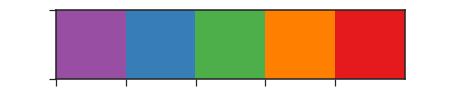

In [7]:
#Construct Color Palette for Glaciers
glacier_pal = ["#984ea3", "#377eb8", "#4daf4a", "#ff7f00", "#e41a1c"]
sns.palplot(sns.color_palette(glacier_pal))

<IPython.core.display.Javascript object>


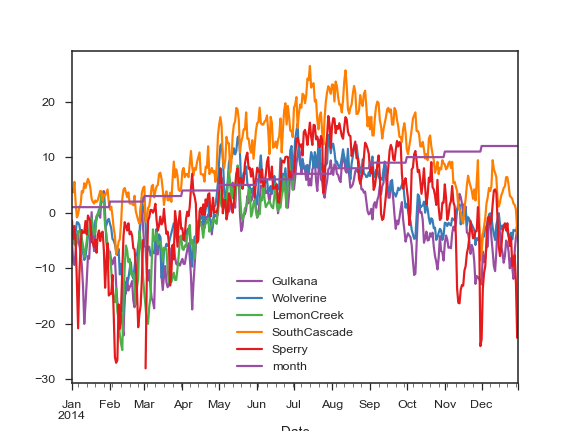

In [25]:
alldat['2014'].plot(color=glacier_pal)

<IPython.core.display.Javascript object>


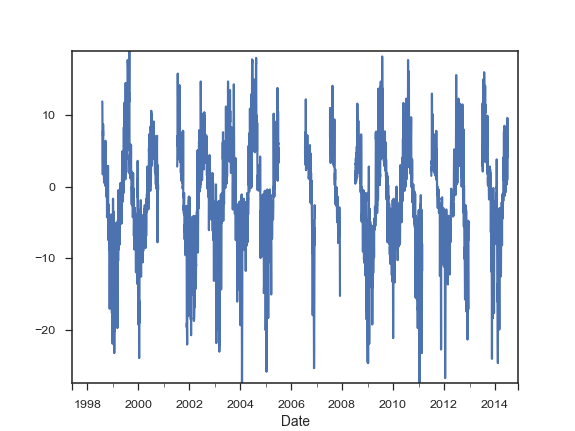

In [20]:
plt.figure()
alldat.LemonCreek.plot()

In [26]:
temp_var='Temperature'
precip_var='Precipitation'

In [27]:
yrdat=pd.DataFrame()
for Glacier in Glaciers:
    yrdat[Glacier]=wx.aggregate_time_with_threshold(alldat[Glacier], 'AS',func='mean', steps_in_period=365, threshold=0.8)

In [28]:
yrdat_melt=pd.melt(yrdat.reset_index(), value_name=temp_var, var_name='Glacier', id_vars='Date')
yrdat_melt.set_index('Date', inplace=True)
yrdat_melt['Year']=yrdat_melt.index.year

<IPython.core.display.Javascript object>


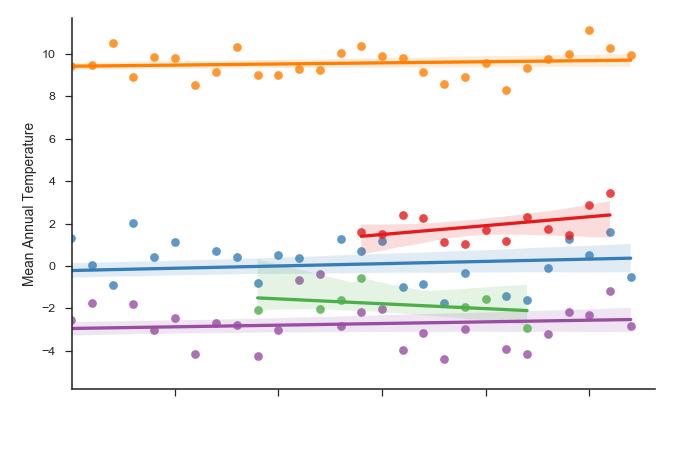

In [29]:
panel_a=sns.lmplot(x="Year", y="Temperature", hue="Glacier", data=yrdat_melt, truncate=True, sharex=True, legend=False,
            palette=sns.color_palette(glacier_pal), aspect=1.5)
#plt.legend(loc='lower left')
plt.ylabel('Mean Annual Temperature')
panel_a.set_xticklabels([])
panel_a.set_axis_labels(x_var='')
plt.savefig(save_dir + 'MeanAnnualTemperatureBLAH.jpg')

## Make Plot of Mean Summer Temperature

In [30]:
season=season_list[0]
season_nam=season_names[0]
alldat['month']=alldat.index.month
season_dat=alldat[alldat.month.isin(season)].copy()

In [31]:
yrdat_summer=pd.DataFrame()
for Glacier in Glaciers:
    yrdat_summer[Glacier]=wx.aggregate_time_with_threshold(season_dat[Glacier], 'AS',func='mean', steps_in_period=90, threshold=0.8)

In [32]:
yrdat_melt_summer=pd.melt(yrdat_summer.reset_index(), value_name=temp_var, var_name='Glacier', id_vars='Date')
yrdat_melt_summer.set_index('Date', inplace=True)
yrdat_melt_summer['Year']=yrdat_melt_summer.index.year

<IPython.core.display.Javascript object>


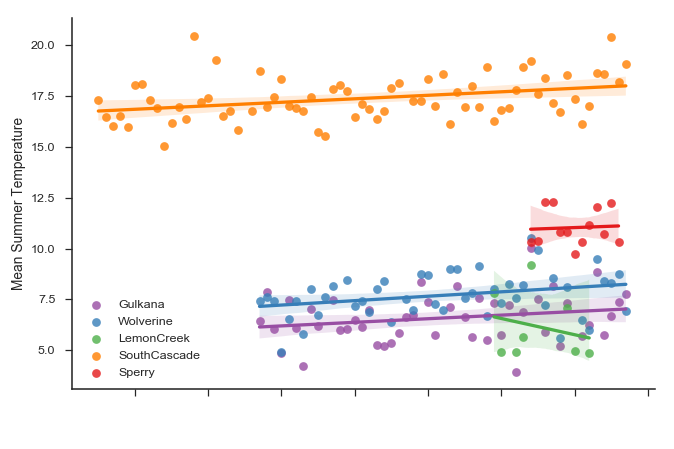

In [33]:
panel_b=sns.lmplot(x="Year", y="Temperature", hue="Glacier", data=yrdat_melt_summer, truncate=True,
            palette=sns.color_palette(glacier_pal), legend=False, aspect=1.5)
plt.legend(loc='lower left')
plt.ylabel('Mean Summer Temperature')
panel_b.set_xticklabels([])
panel_b.set_axis_labels(x_var='')
plt.savefig(save_dir + 'MeanSummerTemperatureBLAH.jpg', dpi=600)

## Make Plot of Total Winter Precipitation

* not using under catch correction (for trend analysis purposes, as rec. by Bieniek)

In [16]:
#Read in new 'alldat' of precipitation (not temperature) data
alldat=pd.DataFrame()
    
for Glacier in ['SouthCascade'] +Glaciers: #Neccesary to put south cascade first due to long time record

    #Define 'main' site at each glacier
    if Glacier=='Gulkana':
        Station='1480'
    if Glacier=='Wolverine':
        Station='990'
    if Glacier=='LemonCreek':
        Station='5'
    if Glacier=='SouthCascade':
        Station='270'
    if Glacier=='Sperry':
        Station='1920'
    
    #Read in data
    data_dir=base_path +"Data/"+Glacier+ r"/AllYears/Wx/LVL3/"

    #fl="Undercatch_Adj" + Glacier+ "_Daily_Weather.csv"
    fl='RainSnowFractionData_' + Glacier + Station+ '.csv'
    if Glacier=='JuneauIcefield':
        data_dir=base_path +"Data/"+Glacier+ r"/AllYears/Wx/LVL2/"
        fl=Glacier.lower() +Station + '_daily_LVL2.csv'
        temp_col_L3name='Temp_USGS'    
    pth=os.path.join(data_dir, fl)
    dat=pd.read_csv(pth)
    print("read data from "+ pth)

    #Set time index
    dat.Date=pd.to_datetime(dat.Date, format='%Y/%m/%d')
    dat=dat.set_index('Date')

    #Abbreviate precip column name
    dat.rename(columns={'Precip_MeasuredWindSpeed_UndercatchAdj':'precip_adj'}, inplace=True)
    #Add month column
    dat['month']=dat.index.month
    dat['decimal_date']=dat.index.year + (dat.index.dayofyear-1)/365

    #If read in LVL2 data, rename temperature column
    if Glacier=='JuneauIcefield':
        dat.rename(columns={temp_col_L3name:'Temperature'}, inplace=True)

    #Store Temperature as the glacier name
    alldat[Glacier]=dat.Precipitation

read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/SouthCascade/AllYears/Wx/LVL3/RainSnowFractionData_SouthCascade270.csv
read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/Gulkana/AllYears/Wx/LVL3/RainSnowFractionData_Gulkana1480.csv
read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/Wolverine/AllYears/Wx/LVL3/RainSnowFractionData_Wolverine990.csv
read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/LemonCreek/AllYears/Wx/LVL3/RainSnowFractionData_LemonCreek5.csv
read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/SouthCascade/AllYears/Wx/LVL3/RainSnowFractionData_SouthCascade270.csv
read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/Sperry/AllYears/Wx/LVL3/RainSnowFractionData_Sperry1920.csv


In [17]:
season=season_list[1]
season_nam=season_names[1]
alldat['month']=alldat.index.month
season_dat=alldat[alldat.month.isin(season)].copy()

In [18]:
wint_precip_dat=pd.DataFrame()
for Glacier in Glaciers:
    wint_precip_dat[Glacier]=wx.aggregate_time_with_threshold(season_dat[Glacier], 'AS',func='sum', steps_in_period=90, threshold=0.8)

In [19]:
wint_precip_dat_melt=pd.melt(wint_precip_dat.reset_index(), value_name=precip_var, var_name='Glacier', id_vars='Date')
wint_precip_dat_melt.set_index('Date', inplace=True)
wint_precip_dat_melt['Year']=wint_precip_dat_melt.index.year

<IPython.core.display.Javascript object>


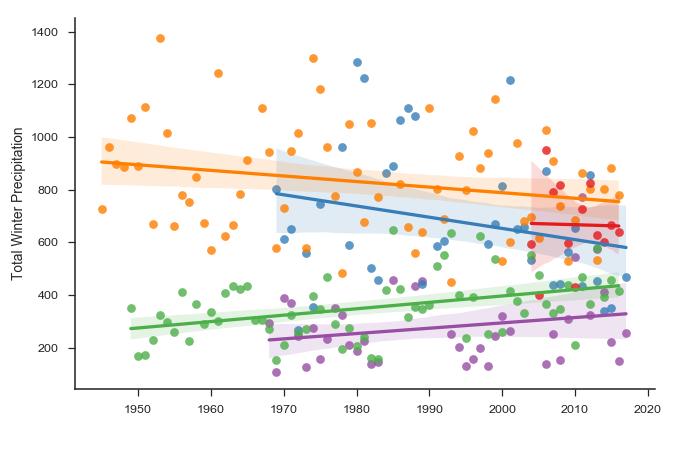

C:/Users/ehbaker/Documents/Reanalysis/


In [28]:
panel_c=sns.lmplot(x="Year", y=precip_var, hue="Glacier", data=wint_precip_dat_melt, truncate=True,
            palette=sns.color_palette(glacier_pal), legend=False, aspect=1.5, legend_out=True)
#plt.legend(loc='upper right')
plt.ylabel('Total Winter Precipitation')
panel_c.set_axis_labels(x_var='')
plt.savefig(save_dir + 'TotalWinterPrecipBLAH2.jpg')
print(save_dir)

<IPython.core.display.Javascript object>


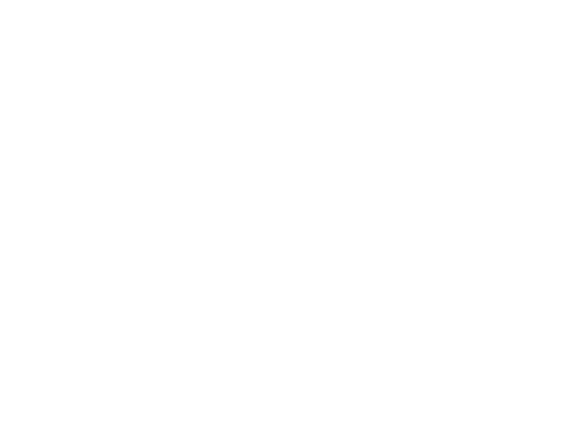

AttributeError: 'FacetGrid' object has no attribute 'legend'

In [30]:
plt.figure()
panel_c.legend()

In [21]:
## Working on making all 3 plot on single figure; difficult....

In [22]:
yrdat_melt['plot_row']='mean annual T'

In [23]:
yrdat_melt_summer['plot_row']='mean summer T'

In [24]:
boom=yrdat_melt.append(yrdat_melt_summer)

<IPython.core.display.Javascript object>


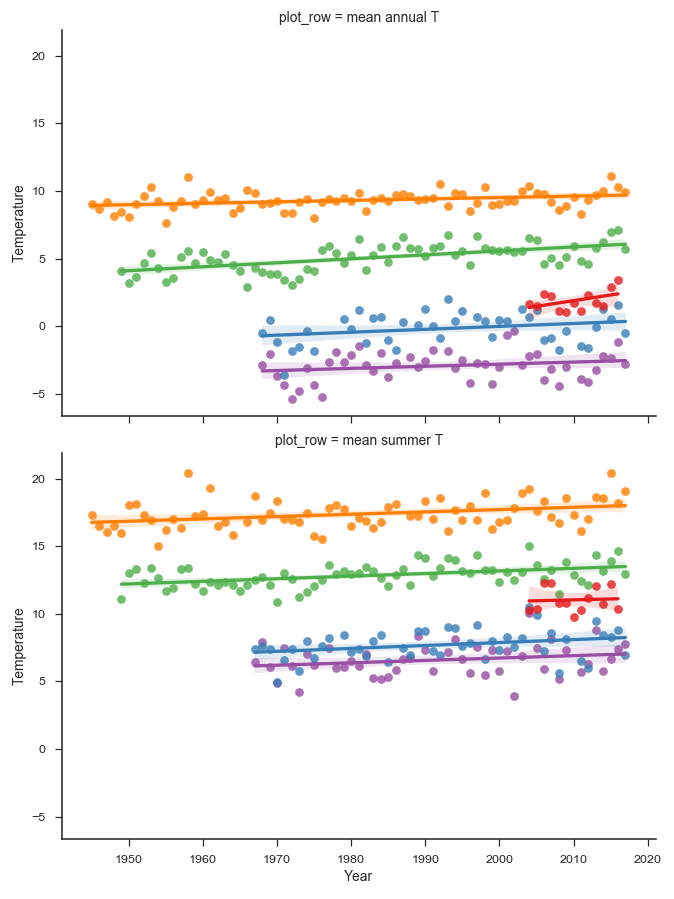

In [27]:
panel_c=sns.lmplot(x="Year", y=temp_var, hue="Glacier", data=boom, truncate=True, sharex=True, row='plot_row',
            palette=sns.color_palette(glacier_pal), legend=False, aspect=1.5, legend_out=True)
#plt.legend(loc='upper right')
#plt.ylabel('Total Winter Precipitation')

In [26]:
fig, axs = plt.subplots(nrows=3)
sns.regplot(x='Year', y=precip_var, data=wint_precip_dat_melt, ax=axs[0], hue='Glacier')
#sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])

<IPython.core.display.Javascript object>

TypeError: regplot() got an unexpected keyword argument 'hue'

In [ ]:
snsreg